#### End-to-end heart disease classification
* building machine learning model to predict heart disease patient based on their medical history

Steps:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

##### 2. Data
* taken from kaggle which the version of UCI Machine learning repository.
https://www.kaggle.com/ronitf/heart-disease-uci

##### 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

##### 4. Features
**Create data dictionary**
* `age` age in years
* `sex` (1 = male; 0 = female)
* `cp` chest pain type
* `trestbps` resting blood pressure (in mm Hg on admission to the hospital)
* `chol` serum cholestoral in mg/dl
* `fbs`(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* `restecg` resting electrocardiographic results
* `thalach` maximum heart rate achieved
* `exang` exercise induced angina (1 = yes; 0 = no)
* `oldpeak` ST depression induced by exercise relative to rest
* `slope` the slope of the peak exercise ST segment
* `ca` number of major vessels (0-3) colored by flourosopy
* `thal 3` = normal; 6 = fixed defect; 7 = reversable defect
* `target` 1 or 0

In [2]:
# Preparing the tools
# importing all the tools we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# we want our plots to appear inside the notebook
%matplotlib inline

# Models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


##### Loading data

In [5]:
df = pd.read_csv("../data/heart-disease.csv")
df[:2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [6]:
df.shape

(303, 14)

##### Data Exploration (EDA (exploratory data analysis))
1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

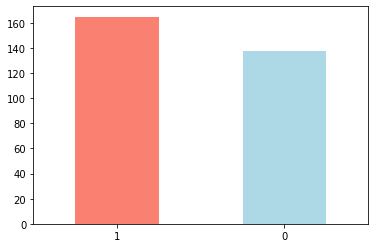

In [24]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])
plt.xticks(rotation=0)

In [10]:
# checking missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# numerical data 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Heart Disease Frequency according to Sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

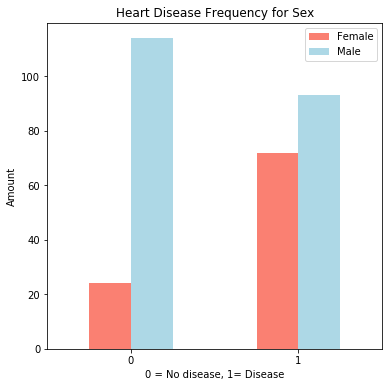

In [22]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(6,6),
                                  color=['salmon','lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel('0 = No disease, 1= Disease')
plt.ylabel('Amount')
plt.legend(["Female","Male"]);
plt.xticks(rotation=0)

##### Age vs Max heart rate(thalach)

In [25]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

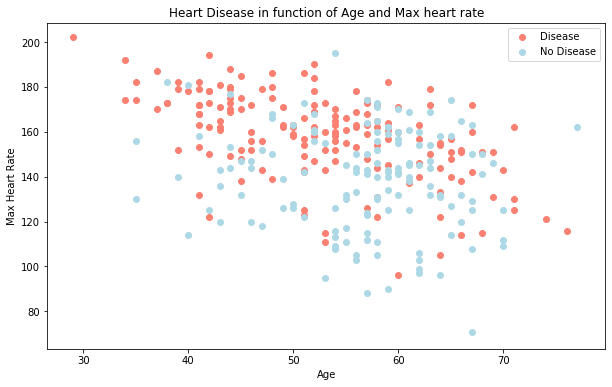

In [29]:
#Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target!=1],
           df.thalach[df.target!=1],
           c='lightblue')


# Add some helpful info
plt.title("Heart Disease in function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease','No Disease'])

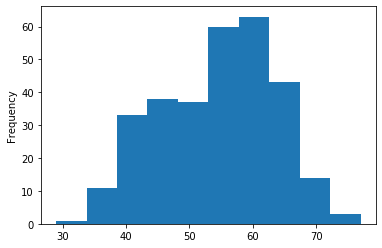

In [30]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

##### Heart Disease Frequency per Chest Pain Type
 cp: chest pain type
* 0: typical angina: chest pain related to decrease blood supply to the heart
* 1: atypical angina: chest pain not related to heart
* 2: non-anginal pain: typically esophageal spasms(non heart related)
* 3: asymptomatic: chest pain not showing signs of disease

In [31]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


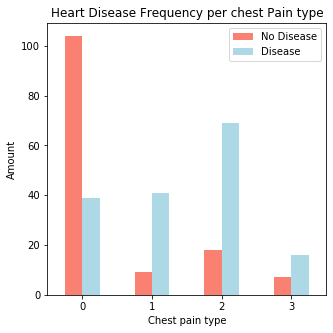

In [34]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(5,5),
                                 color=['salmon','lightblue'])
plt.title('Heart Disease Frequency per chest Pain type')
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [35]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


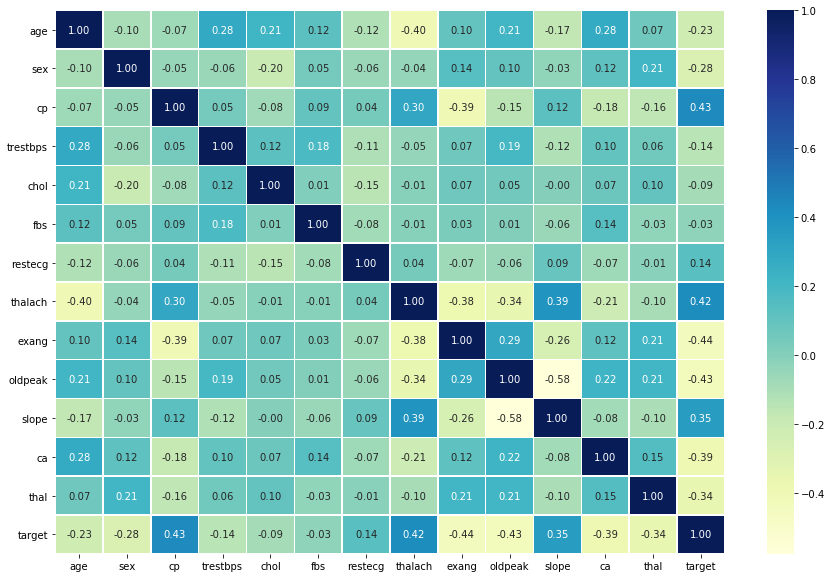

In [40]:
# lets visualize the correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu');

#incase of matplotlib seaborn first and last label cut-off
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom+0.5,top-0.5)

##### Modelling

In [41]:
# split data into X and y
X = df.drop("target",axis=1)
y = df['target']

In [42]:
X.shape,y.shape

((303, 13), (303,))

In [43]:
# split data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [45]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

##### different models we'll be trying
1. Logistic Regression
2. K-Nearest Neighbours
3. Random Forest

In [49]:
### put modells in a dict
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    #Make a dictionary to keep models scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

In [50]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

##### Model Comparison

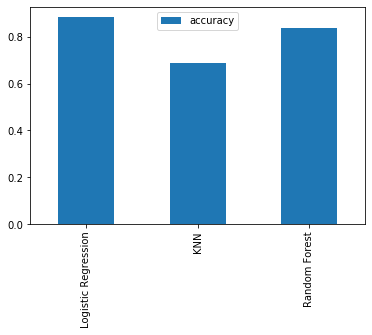

In [54]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

##### Hyper parameter tuning on baseline model 
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve 
* Area under the curve(AUC)

**Hyperparameter Tuning**

In [56]:
# tunning KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbours
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbourabs
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train,y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # update the test scores lits
    test_scores.append(knn.score(X_test,y_test))

Maximum KNN score on the test data: 75.41%


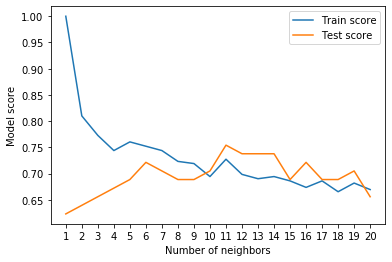

In [60]:
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors, test_scores,label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

##### Hyperparameter tuning with `RandomizedSearchCV`
LogisticRegression & RandomforestClassifier

In [61]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [67]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver':['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}


In [63]:
# Tuning the hyperparameter Logistic Regression
np.random.seed(42)

# Setup random hyperparamter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [64]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [65]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

##### hyperparamter tuning of Random Forest using RandomizedSearchCV 

In [68]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter grid for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [69]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [70]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [71]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

##### Hyperparameter tuning with GridSearchCV

In [72]:
# Different hyperparameter for our LogisticRegression model
log_reg_grid = {'C':np.logspace(-4,4,30),
               'solver':['liblinear']}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [73]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [74]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [75]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

##### Evaluating tuned machine learning classifier, beyond Accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [76]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

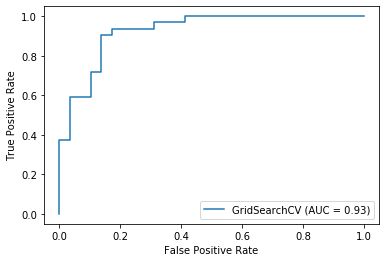

In [77]:
# using ROC curve from sklearn
# plot ROC curve and calculate AUC metric

plot_roc_curve(gs_log_reg, X_test,y_test)

In [78]:
# Confusionn matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


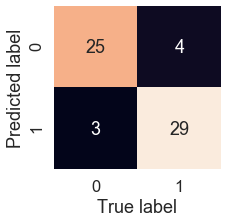

In [80]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

In [81]:
# weighted avg will gives more value to group which is greater in number
# macro avg -> considers the imbalance in the dataset
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [82]:
# Checking the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [83]:
clf = LogisticRegression(C= 0.20433597178569418,
                        solver='liblinear')

In [90]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,
                        cv=5,
                        scoring='accuracy')
cv_acc = np.mean(cv_acc)

In [91]:
# Cross-validation precision
cv_prec = cross_val_score(clf,
                         X,y,
                         scoring='precision')
cv_prec = np.mean(cv_prec)

In [89]:
# Cross-validation recall
cv_recall = cross_val_score(clf,
                           X,y,
                           scoring='recall')
cv_recall = np.mean(cv_recall)

In [88]:
# Cross-validation f1-score
cv_f1 = cross_val_score(clf,
                           X,y,
                           scoring='f1')
cv_f1 = np.mean(cv_f1)

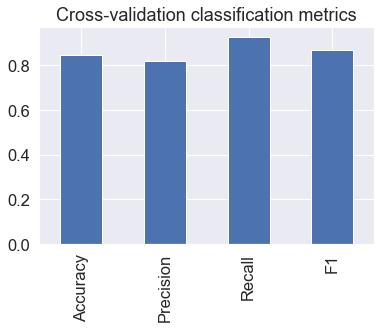

In [93]:
# Visualize cross-validation metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall":cv_recall,
                          "F1":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-validation classification metrics',
                     legend=False);

##### Feature Importance
Which of the features contributed most to the outcomes of the model and how they contribute?

> finding feature importance is different for each machine learning model

In [94]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [95]:
clf_log = LogisticRegression(C=0.20433597178569418,
                            solver='liblinear')
clf_log.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
clf_log.coef_

array([[ 0.00316728, -0.86044622,  0.66067059, -0.01156993, -0.00166374,
         0.04386122,  0.31275815,  0.02459361, -0.60413062, -0.5686283 ,
         0.45051625, -0.63609881, -0.67663383]])

In [97]:
# Matching coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf_log.coef_[0])))
feature_dict

{'age': 0.0031672775089892488,
 'sex': -0.8604462193284903,
 'cp': 0.6606705857793441,
 'trestbps': -0.01156993031867032,
 'chol': -0.0016637442407918324,
 'fbs': 0.04386122408903933,
 'restecg': 0.31275815497333875,
 'thalach': 0.024593612835517458,
 'exang': -0.6041306248075571,
 'oldpeak': -0.5686282991341255,
 'slope': 0.4505162464116119,
 'ca': -0.6360988070697587,
 'thal': -0.6766338279094292}

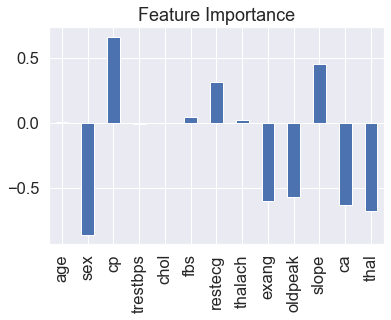

In [98]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False)

In [99]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [100]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


 cp: chest pain type
* 0: typical angina: chest pain related to decrease blood supply to the heart
* 1: atypical angina: chest pain not related to heart
* 2: non-anginal pain: typically esophageal spasms(non heart related)
* 3: asymptomatic: chest pain not showing signs of disease

##### Experimentation
* could you collect more data?
* could you try a better model? like CatBoost or XGBoost
* could you improve the current models? (beyond what have been achieved)